# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Investment and Trading Capstone Project Proposal

Building a stock price predictor that takes daily trading data over a certain date range as input, and outputs projected estimates for given query dates. By looking at the historical data of a given stock as an input, the stock predictor application will train the model to predict the Adjusted Close value for the given stock in the future. The model will be created using regression algorithms as we are trying to predict the stock price.  Having such a software system will help people like me to make more educated decisions managing their stock portfolio.

The data is extracted from Yahoo fiance API using the following URL: http://finance.yahoo.com/q/hp?s=GOOG&a=01&b=19&c=2010&d=01&e=19&f=2010&g=d.

The datasets are stored in the datasets folder. The folder contain the following stocks symbols:

* GOOG - Google
* AAPL - Apple
* AMZN - Amazon
* MSFT - Microsoft

## Exploring the Data

In [244]:
# Import libraries
import pandas as pd
import numpy as np

def get_file_name(stock):
    #Method to read file from datasets folder
    return 'datasets/{}.csv'.format(stock)

# Any stock from ['GOOG', 'AAPL', 'AMZN', 'MSFT']
stock = 'GOOG'
# Read GOOG data, using date as the index column for the dataset
dataset = pd.read_csv(get_file_name(stock), parse_dates = True, index_col = 'Date', na_values=['nan'])
print dataset.head()
print "Data read successfully!"


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-22  305.574646  305.758942  296.887207  599.155029  299.278229   
2012-05-23  299.701630  303.661804  297.445099  607.791382  303.592072   
2012-05-24  303.442627  304.817474  298.316833  602.007202  300.702881   
2012-05-25  299.377869  299.741486  293.041595  589.910461  294.660553   
2012-05-29  296.792542  298.446350  293.061523  592.712769  296.060303   

             Volume  
Date                 
2012-05-22  6126600  
2012-05-23  6379900  
2012-05-24  3796600  
2012-05-25  7190500  
2012-05-29  5230900  
Data read successfully!


## Implementation: Data Exploration

In [245]:
# Calculate number of entries in the historical data
number_of_entries = dataset.shape[0]

# Calculate number of features
number_of_features = len(dataset.columns) 

# Calculate the minimun Adj Close price
min_adj_price = dataset['Adj Close'].min()

# Calculate the minimun Adj Close price
max_adj_price = dataset['Adj Close'].max()

# Calculate the minimun Adj Close price
mean_adj_price = dataset['Adj Close'].mean()

# Print the results
print "Total number of Entries: {}".format(number_of_entries)
print "Number of features: {}".format(number_of_features)
print "Minimun Adj Close price: {}".format(min_adj_price)
print "Max Adj Close price: {}".format(max_adj_price)
print "Mean Adj Close price : {}".format(mean_adj_price)

Total number of Entries: 1258
Number of features: 6
Minimun Adj Close price: 278.481171
Max Adj Close price: 943.0
Mean Adj Close price : 574.876405461


## Preparing the Data

## Identify feature and target columns

The code below will identify the features and separate the target column from the dataset, at the end it will create:

* X_all - the dataset cotaininng only the feature columns.
* y_all - the target column.

In [246]:

dataset.sort_index(ascending=True, axis=0)
dataset['Tomorrows Date'] = dataset['Adj Close']
dataset['Tomorrows Date'] = dataset['Tomorrows Date'].shift(-1)
dataset = dataset[0:len(dataset)-1]

#Target variable
y_all = dataset['Tomorrows Date']
#Dropping the target variable from the main dataset.
X_all = dataset.drop(['Tomorrows Date'], axis = 1)

# Extract feature columns
features = list(X_all.columns)

print "\nOriginal dataset:\n {}".format(dataset.head())
print "\nFeatures: {}".format(features)
print "\nTarget column:\n {}".format(y_all.head())
print "\nDaset without the target column:\n {}".format(X_all.head())


Original dataset:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-22  305.574646  305.758942  296.887207  599.155029  299.278229   
2012-05-23  299.701630  303.661804  297.445099  607.791382  303.592072   
2012-05-24  303.442627  304.817474  298.316833  602.007202  300.702881   
2012-05-25  299.377869  299.741486  293.041595  589.910461  294.660553   
2012-05-29  296.792542  298.446350  293.061523  592.712769  296.060303   

             Volume  Tomorrows Date  
Date                                 
2012-05-22  6126600      303.592072  
2012-05-23  6379900      300.702881  
2012-05-24  3796600      294.660553  
2012-05-25  7190500      296.060303  
2012-05-29  5230900      293.016693  

Features: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Target column:
 Date
2012-05-22    303.592072
2012-05-23    300.702881
2012-05-24    294.660553
2012-05-25    296.060303
2012-0

## Statistical Information

In [262]:
print X_all.describe()

              Open         High          Low        Close    Adj Close  \
count  1257.000000  1257.000000  1257.000000  1257.000000  1257.000000   
mean    574.670656   579.002621   569.857201   730.132065   574.584454   
std     157.438846   158.364195   156.473257   165.820660   157.466377   
min     279.123779   281.205963   277.220917   491.201416   278.481171   
25%     442.665771   446.167664   440.354431   577.594238   442.675751   
50%     556.532043   559.813049   551.981018   721.688660   556.573853   
75%     719.469971   724.479980   713.000000   812.479370   718.359985   
max     940.000000   943.109985   937.580017  1216.829224   943.000000   

             Volume  
count  1.257000e+03  
mean   2.845960e+06  
std    2.065757e+06  
min    7.900000e+03  
25%    1.488100e+06  
50%    2.194200e+06  
75%    3.761500e+06  
max    2.497790e+07  


# Benchmark

## Implementation: Training and Testing Data Split

The implementation requires that the dataset to be splitted the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.
For the code cell below, does the following:

* Splits the data into 80% training and 20% testing.
* Sets the random_state for train_test_split to a value of your choicet to ensure the results to be consistent.
* Assigs the train and testing splits to X_train, X_test, y_train, and y_test.

In [247]:
from sklearn.model_selection import train_test_split


def split_data(X, y):
    print "********************Splitting the Data******************"
    training_size = int((len(X)) * 0.90)
    X_train, X_test = X[0:training_size], X[training_size:len(X)] 
    y_train, y_test = y[0:training_size], y[training_size:len(X)]
    print y_test.tail()
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X_all,y_all)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

********************Splitting the Data******************
Date
2017-05-15    943.000000
2017-05-16    919.619995
2017-05-17    930.239990
2017-05-18    934.010010
2017-05-19    941.859985
Name: Tomorrows Date, dtype: float64
Training set has 1131 samples.
Testing set has 126 samples.


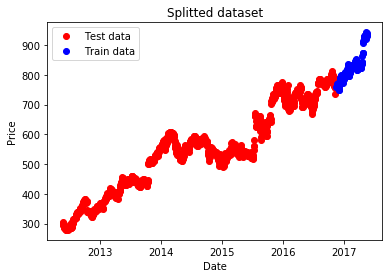

In [249]:
def plot_split_results(X_test, X_train, y_test, y_train):
    stock_date_test = pd.DataFrame()
    stock_date_train = pd.DataFrame()
    stock_date_test['Date'] = X_test.index
    stock_date_train['Date'] = X_train.index
    
    fig, ax = plt.subplots()
    ax.plot_date(stock_date_test, y_test, color ='r', label = 'Test data', linewidth=1)
    ax.plot_date(stock_date_train, y_train, color ='b', label = 'Train data', linewidth=1)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    
    plt.legend()
    plt.title('Splitted dataset')
    plt.show()
    
plot_split_results(X_train, X_test, y_train, y_test)

## Benchmark

In [250]:
from sklearn.dummy import DummyRegressor

def benchmark(X_train, X_test, y_train, y_test):
    print "********************DummyRegressor Model******************"
    model = DummyRegressor()
    model.fit(X_train, y_train)
    print '{}'.format(model.score(X_test, y_test))
    return model

benchmark(X_train, X_test, y_train, y_test)

********************DummyRegressor Model******************
-35.2392292353


DummyRegressor(constant=None, quantile=None, strategy='mean')

## Data Preprocessing

To get a better understanding of the dataset, we can construct a scatter matrix of each of the features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

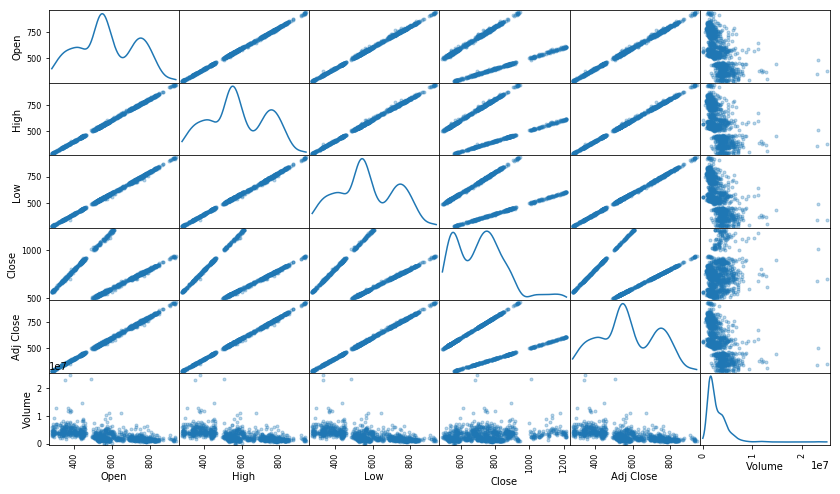

In [251]:
import matplotlib.pyplot as plt

pd.scatter_matrix(X_all, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.show()

## Implementation: Feature Scaling

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural algorithm.

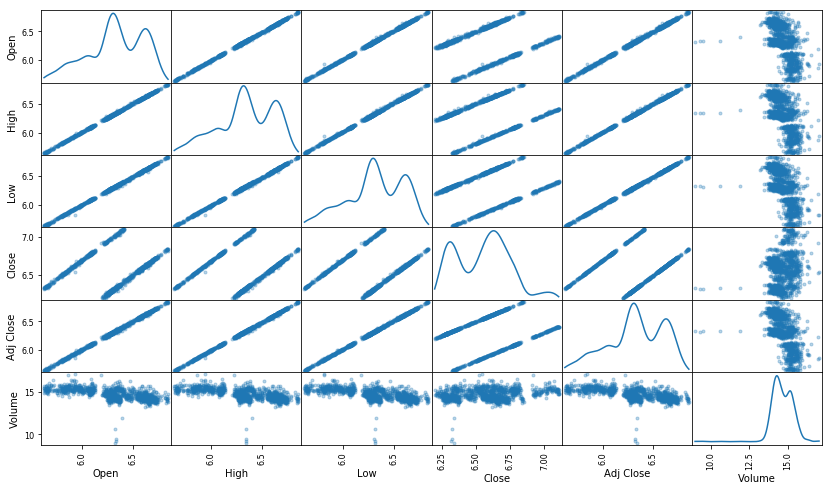

In [252]:
log_data = np.log(X_all)
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.show()

## Implementation: Define a Performance Metric


It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

In [253]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

#random stock prices, just to validate our socorer is working
score = performance_metric([650, 945, 740, 630], [660, 930, 750, 620])
print "Model has a coefficient of determination, R^2, of {:.8f}.".format(score)

Model has a coefficient of determination, R^2, of 0.99156203.


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the:
**Linear Regression**, **KNeighborsRegressor**, **SVR Regressor**, and **Lasso**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the parametera for each algorithm. 

In [254]:
from time import time

def fit_model(X, y, regressor):
    """ Performs grid search for a regressor trained on the input data [X, y]. """
    
    # Indicate the classifier and the training set size
    print "Training using: {}. Training set size of {}. . .".format(regressor.__class__.__name__, len(X))

    # Fit the grid search object to the data to compute the optimal model
    start = time()
    regressor.fit(X, y)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    # Return the trained model
    return regressor


## Implementation: Model Performance Metrics

With the predefined function above, now we'll import the two supervised learning models and run the fit_model function for each one.


In [255]:
#Import 'make_scorer', 'LinearRegression', 'SVR' and 'KNeighborsRegressor'
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#Fit the training data to the model using grid search using LinearRegression
linear_reg = fit_model(X_train, y_train, LinearRegression())
print "Score: {}".format(linear_reg.score(X_test, y_test))
print "------------------------------------------------------------------------"

# Fit the training data to the model using Lasso
lasso_reg = fit_model(X_train, y_train, Lasso())
print "Score: {}".format(lasso_reg.score(X_test, y_test))
print "------------------------------------------------------------------------"

# Fit the training data to the model using SVR
svr_reg = fit_model(X_train, y_train, SVR())
print "Score: {}".format(svr_reg.score(X_test, y_test))
print "------------------------------------------------------------------------"

# Fit the training data to the model using KNeighborsRegressor
kn_reg = fit_model(X_train, y_train, KNeighborsRegressor())
print "Score: {}".format(kn_reg.score(X_test, y_test))

Training using: LinearRegression. Training set size of 1131. . .
Trained model in 0.0295 seconds
Score: 0.976145747214
------------------------------------------------------------------------
Training using: Lasso. Training set size of 1131. . .
Trained model in 0.0167 seconds
Score: 0.973000112941
------------------------------------------------------------------------
Training using: SVR. Training set size of 1131. . .
Trained model in 0.1067 seconds
Score: -36.6662215986
------------------------------------------------------------------------
Training using: KNeighborsRegressor. Training set size of 1131. . .
Trained model in 0.0017 seconds
Score: -19.0346707517


## Choosing the Best Model

In this section, will help to choose from the two supervised learning models the best model to use on the stock data. 

In [256]:
import sklearn.learning_curve as curves
from sklearn.model_selection import KFold

def plot_learning_curve(regressor, title, X, y):
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    plt.figure()
    plt.title(title)
    plt.grid()
    
    # Calculate the training and testing scores
    sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
                                                             cv = cv, train_sizes = train_sizes, scoring = 'r2')
    # Find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    
    # Subplot the learning curve 
    plt.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
    plt.fill_between(sizes, train_mean - train_std,train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Labels
    plt.xlabel("Number of Training Points")
    plt.ylabel("Score")
    plt.legend(loc="best")
    #plt.xlim([0, X.shape[0]*0.8])
    #plt.ylim([-0.05, 1.05])


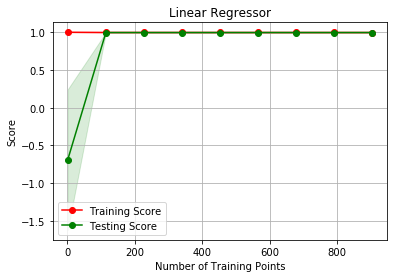

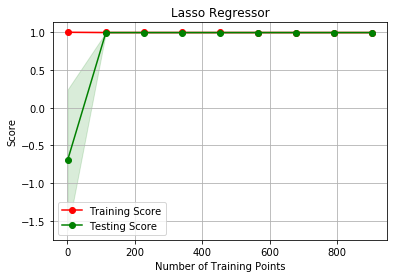

In [236]:
# KFold cross
#k_fold = KFold(n_splits=5, random_state=20, shuffle=True)

# Cross validation to get smoother mean test and train
plot_learning_curve(linear_reg, 'Linear Regressor', X_train, y_train)
plot_learning_curve(lasso_reg, 'Lasso Regressor', X_train, y_train)
plt.show()

## Implementation: Model Tuning

Fine tune the chosen model. Use grid search (GridSearchCV) with at least one important parameter tuned with at least different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:

* Import sklearn.grid_search.GridSearchCV and sklearn.metrics.make_scorer.
* Create a dictionary of parameters you wish to tune for the chosen model. Example: parameters = {'parameter' : [list of values]}.
* Initialize the classifier you've chosen and store it in clf.
* Create the R2 scoring function using make_scorer and store it in r2_scorer.
* Set the pos_label parameter to the correct value!
* Perform grid search on the classifier clf using f1_scorer as the scoring method, and store it in grid_obj.
* Fit the grid search object to the training data (X_train, y_train), and store it in grid_obj.

In [257]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def fit_model_tunning(X, y, regressor, params):
    """ Performs grid search for a regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
              #ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # Indicate the classifier and the training set size
    print "Training using: {}. Training set size of {}. . .".format(regressor.__class__.__name__, len(X))

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    r2_scorer = make_scorer(performance_metric)

    # Creates the grid search object
    grid = GridSearchCV(regressor, params, scoring = r2_scorer, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    start = time()
    grid = grid.fit(X, y)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)
    

    # Return the optimal model aft
    return grid.best_estimator_


In [258]:

#Fit the training data to the model using grid search using LinearRegression
linear_reg_upd = fit_model_tunning(X_train, y_train, LinearRegression(), {'fit_intercept': (True, False), 'normalize':(True, False)})
print "Parameters for the optimal model: {}".format(linear_reg_upd.get_params())
print "Score: {}".format(linear_reg_upd.score(X_test, y_test))
print "------------------------------------------------------------------------"


# Fit the training data to the model using grid search using Lasso
lasso_reg_upd = fit_model_tunning(X_train, y_train, Lasso(random_state=42), {'alpha': [0.1, 0.5, 1.0], 'max_iter':(1000,10000, 150000), 'fit_intercept': (True, False), 'selection': ('random', 'cyclic')})
print "Parameters for the optimal model: {}".format(lasso_reg_upd.get_params())
print "Score: {}".format(lasso_reg_upd.score(X_test, y_test))

Training using: LinearRegression. Training set size of 1131. . .
Trained model in 4.6894 seconds
Parameters for the optimal model: {'copy_X': True, 'normalize': True, 'n_jobs': 1, 'fit_intercept': False}
Score: 0.976615311921
------------------------------------------------------------------------
Training using: Lasso. Training set size of 1131. . .
Trained model in 16.4977 seconds
Parameters for the optimal model: {'normalize': False, 'warm_start': False, 'selection': 'cyclic', 'fit_intercept': True, 'positive': False, 'max_iter': 10000, 'precompute': False, 'random_state': 42, 'tol': 0.0001, 'copy_X': True, 'alpha': 1.0}
Score: 0.976310473071


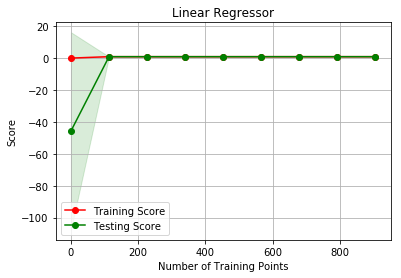

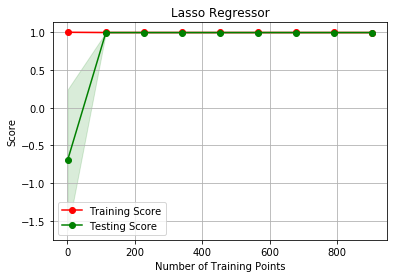

In [259]:
# Cross validation to get smoother mean test and train
plot_learning_curve(linear_reg_upd, 'Linear Regressor', X_train, y_train)
plot_learning_curve(lasso_reg_upd, 'Lasso Regressor', X_train, y_train)
plt.show()

In [260]:
print dataset.corr()

                    Open      High       Low     Close  Adj Close    Volume  \
Open            1.000000  0.999695  0.999510  0.148327   0.999180 -0.520226   
High            0.999695  1.000000  0.999473  0.146585   0.999558 -0.516510   
Low             0.999510  0.999473  1.000000  0.152089   0.999688 -0.527408   
Close           0.148327  0.146585  0.152089  1.000000   0.149599  0.230655   
Adj Close       0.999180  0.999558  0.999688  0.149599   1.000000 -0.522970   
Volume         -0.520226 -0.516510 -0.527408  0.230655  -0.522970  1.000000   
Tomorrows Date  0.997772  0.998181  0.998366  0.149153   0.998652 -0.521917   

                Tomorrows Date  
Open                  0.997772  
High                  0.998181  
Low                   0.998366  
Close                 0.149153  
Adj Close             0.998652  
Volume               -0.521917  
Tomorrows Date        1.000000  
